In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

In [3]:
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.7, random_state=0)
rng = np.random.RandomState(13)
X = np.dot(X, rng.randn(2, 2))

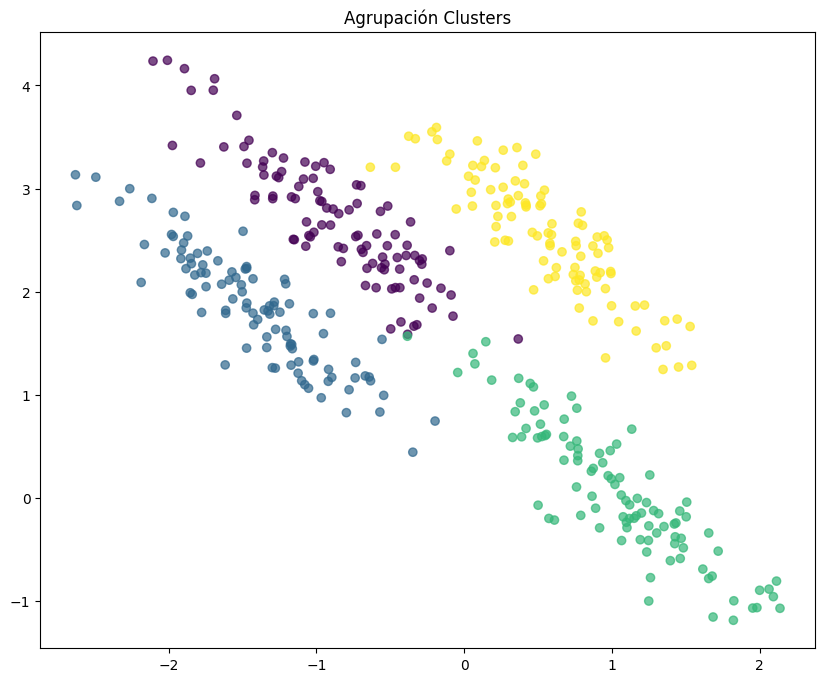

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=y_true, alpha=0.7)
plt.title('Agrupación Clusters')
plt.show();

Aplicación Algoritmo Gaussian Mixture (Expectation-Maximization)

In [8]:
gmm = GaussianMixture(n_components=4, random_state=123).fit(X)
labels = gmm.predict(X)

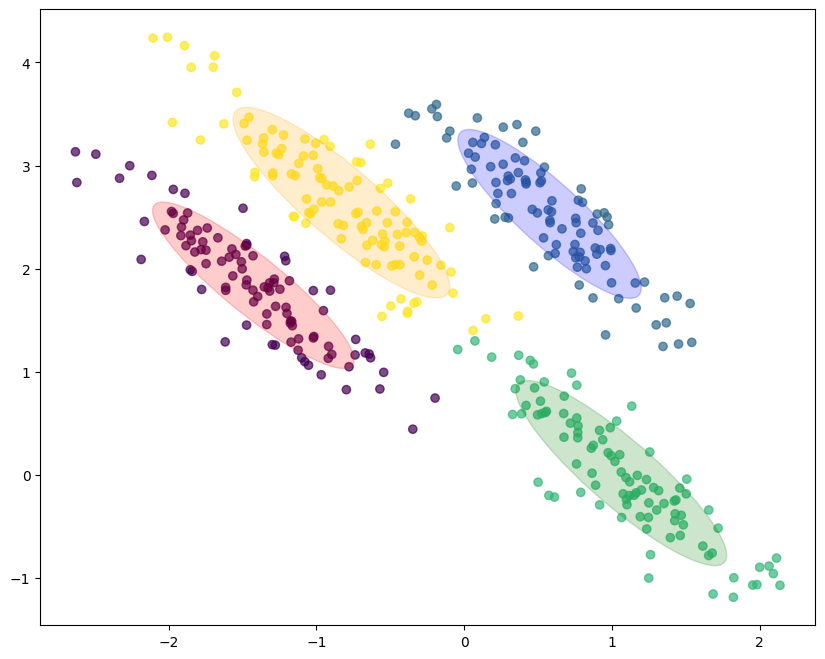

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=labels, alpha=0.7)

colors = ['red', 'blue', 'green', 'orange']
ax = plt.gca()

for i in range(gmm.n_components):
    # Obtener los parámetros de la elipse
    covariances = gmm.covariances_[i]
    v, w = np.linalg.eigh(covariances)
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180. * angle / np.pi  # Convertir a grados

    # Crear y añadir la elipse al gráfico
    ellipse = Ellipse(xy=gmm.means_[i], width=v[0], height=v[1], angle=angle, color=colors[i], alpha=0.2)
    ax.add_patch(ellipse)

plt.show()

In [13]:
np.round(gmm.predict_proba(X[:10]), 3)

array([[0.   , 0.021, 0.   , 0.979],
       [0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.001, 0.999],
       [0.   , 0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.059, 0.941],
       [0.   , 0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ]])